In [1]:
import os                #The OS module in Python provides functions for interacting with the operating system.
import glob              #used to return all file paths that match a specific pattern
from tqdm import tqdm    #tqdm is a library in Python which is used for creating Progress Meters or Progress Bars.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile #oPEN A wav FILE
from python_speech_features import mfcc, logfbank
import librosa as lr
import os,glob,pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
import librosa
get_ipython().magic('matplotlib inline')

### Install Required Libraries

In [3]:
import soundfile
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, LSTM
from keras.layers import Dropout,Dense,TimeDistributed
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Loading the required dataset

In [3]:
os.listdir(path=r'C:\Users\Apurva\Downloads\dataset')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName,entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles+getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = r'C:\Users\Apurva\Downloads\dataset'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

2880

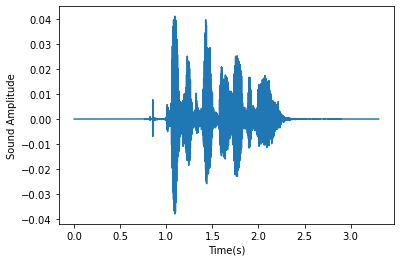

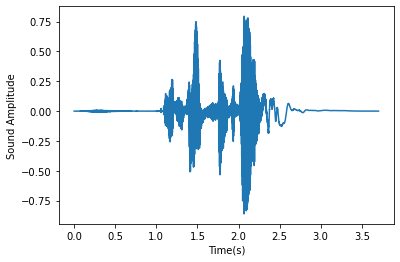

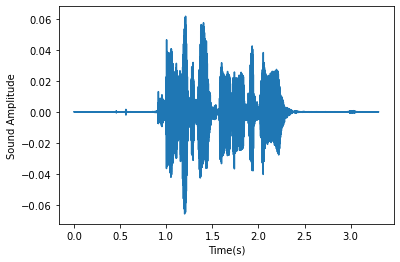

In [4]:
for file in range(0, len(listOfFiles),1000):
    audio, sfreq = lr.load(listOfFiles[file])
    time = np.arange(0,len(audio))/sfreq
    
    fig,ax=plt.subplots()
    ax.plot(time, audio)
    ax.set(xlabel='Time(s)',ylabel='Sound Amplitude')
    plt.show()

<ipython-input-5-cfdacdfaa138>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(listOfFiles[file])
<ipython-input-5-cfdacdfaa138>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


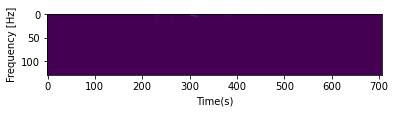

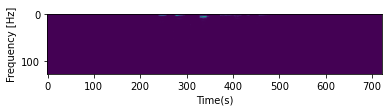

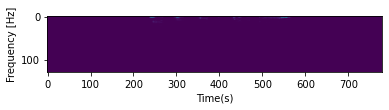

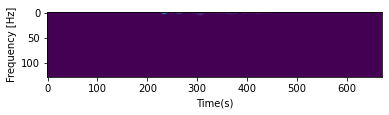

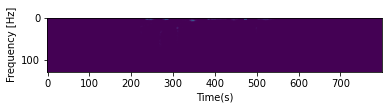

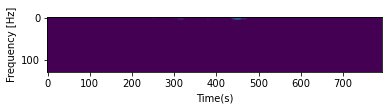

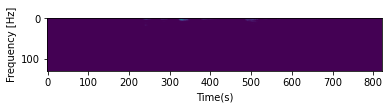

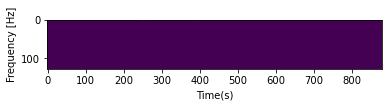

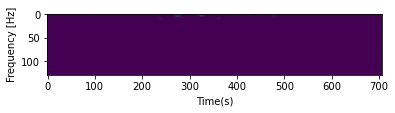

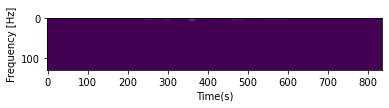

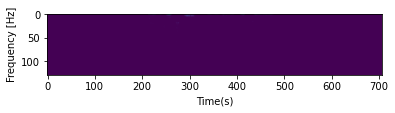

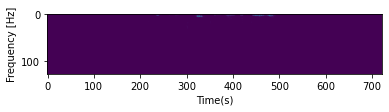

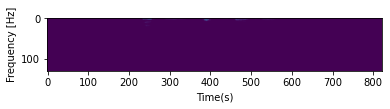

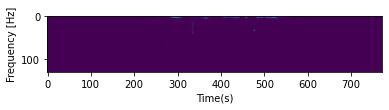

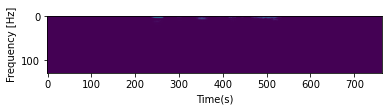

In [5]:
for file in range(0, len(listOfFiles),200):
    sample_rate, samples = wavfile.read(listOfFiles[file])
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    plt.pcolormesh(times, frequencies, spectrogram)
    plt.imshow(spectrogram)
    plt.xlabel('Time(s)')
    plt.ylabel('Frequency [Hz]')
    plt.show()


## Visualisation of Audio Data

In [6]:
def plot_signals(signals):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Time Series' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def plot_fft(fft):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transform' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y,freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
    
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
            
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Capstrum  Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                             cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n , d= 1/rate)
    Y= abs(np.fft.rfft(y)/n)
    return(Y,freq)

<ipython-input-7-da888f9eff0e>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wav.read(listOfFiles[file])


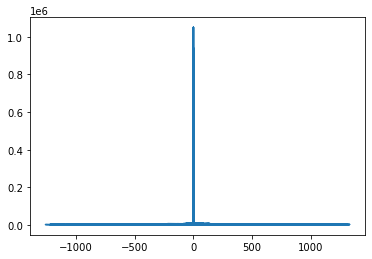

<ipython-input-7-da888f9eff0e>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wav.read(listOfFiles[file])


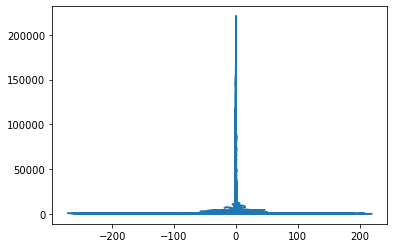

<ipython-input-7-da888f9eff0e>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wav.read(listOfFiles[file])


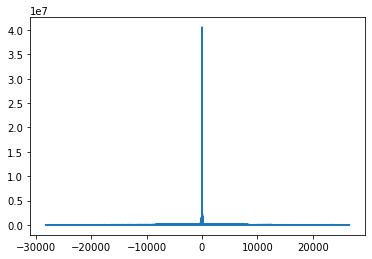

<ipython-input-7-da888f9eff0e>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wav.read(listOfFiles[file])


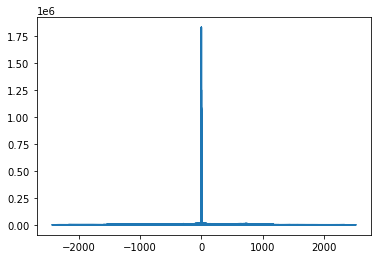

<ipython-input-7-da888f9eff0e>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wav.read(listOfFiles[file])


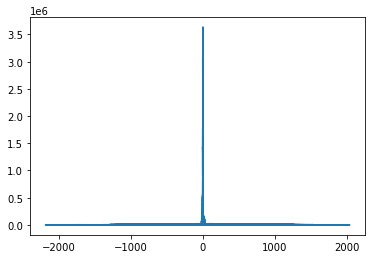

<ipython-input-7-da888f9eff0e>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wav.read(listOfFiles[file])


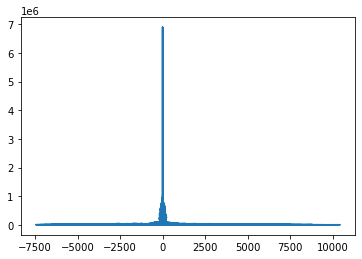

<ipython-input-7-da888f9eff0e>:18: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read(listOfFiles[file])


NameError: name 'envelope' is not defined

In [7]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
for file in range(0 , len(listOfFiles) , 500):
    rate, data = wav.read(listOfFiles[file])
    fft_out = fft(data)
    %matplotlib inline
    plt.plot(data, np.abs(fft_out))
    plt.show()
    
signals={}
fft={}
fbank={}
mfccs={}
# load data
for file in range(0 , len(listOfFiles) , 500):
    rate, data = wavfile.read(listOfFiles[file])
    signal,rate =librosa.load(listOfFiles[file] , sr=44100)
    mask = envelope(signal , rate , 0.0005)
    signals[file] = signal
    fft[file] = calc_fft(signal , rate)

    bank = logfbank(signal[:rate] , rate , nfilt = 26, nfft = 1103).T
    fbank[file] = bank
    mel = mfcc(signal[:rate] , rate , numcep =13 , nfilt = 26 , nfft=1103).T
    mfccs[file]=mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [8]:
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [11]:
import glob,pickle
for file in tqdm(glob.glob(r'C:\Users\Apurva\Downloads\dataset\\**\\*.wav')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'C:\Users\Apurva\Downloads\dataset\cleanSpeech'+str(file_name), rate=rate,data=signal[mask])

100%|██████████████████████████████████████████████████████████████████████████████| 1440/1440 [13:36<00:00,  1.76it/s]


In [12]:
#Feature Extraction of Audio Files Function 
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [13]:
#Emotions in the RAVDESS dataset to be classified Audio Files based on . 
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#These are the emotions User wants to observe more :
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [14]:
#Load the data and extract features for each sound file
from glob import glob                    #used to return all file paths that match a specific pattern
import os
import glob
def load_data(test_size=0.33):
    x,y=[],[]
    answer = 0
    for file in glob.glob(r'C:\Users\Apurva\Downloads\clean_speech\\*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=False)
        x.append(feature)
        y.append([emotion,file_name])
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [15]:
import librosa
import numpy as np
x_train,x_test,y_trai,y_tes=load_data(test_size=0.25)
print(np.shape(x_train),np.shape(x_test), np.shape(y_trai),np.shape(y_tes))
y_test_map = np.array(y_tes).T
y_test = y_test_map[0]
test_filename = y_test_map[1]
y_train_map = np.array(y_trai).T
y_train = y_train_map[0]
train_filename = y_train_map[1]
print(np.shape(y_train),np.shape(y_test))
print(*test_filename,sep="\n")

(576, 52) (192, 52) (576, 2) (192, 2)
(576,) (192,)
dataset03-01-06-01-02-02-01.wav
dataset03-01-03-01-02-01-21.wav
dataset03-01-07-01-02-02-04.wav
dataset03-01-02-02-01-02-24.wav
dataset03-01-07-01-02-02-19.wav
dataset03-01-06-01-01-01-07.wav
dataset03-01-07-01-01-01-16.wav
dataset03-01-02-01-02-02-06.wav
dataset03-01-06-01-01-02-07.wav
dataset03-01-06-02-01-01-15.wav
dataset03-01-02-02-02-02-07.wav
dataset03-01-06-01-02-02-19.wav
dataset03-01-06-02-02-02-05.wav
dataset03-01-06-01-01-01-14.wav
dataset03-01-06-01-02-01-15.wav
dataset03-01-03-02-02-01-06.wav
dataset03-01-02-01-01-02-16.wav
dataset03-01-07-01-01-01-13.wav
dataset03-01-03-02-02-02-24.wav
dataset03-01-02-01-02-02-19.wav
dataset03-01-02-02-01-02-09.wav
dataset03-01-02-01-01-02-07.wav
dataset03-01-03-01-02-01-13.wav
dataset03-01-02-01-02-01-18.wav
dataset03-01-02-02-02-02-03.wav
dataset03-01-02-02-01-01-11.wav
dataset03-01-03-01-02-02-20.wav
dataset03-01-03-02-01-02-06.wav
dataset03-01-06-01-01-02-11.wav
dataset03-01-03-01-0

In [16]:
#Get the shape of the training and testing datasets
# print((x_train.shape[0], x_test.shape[0]))
print((x_train[0], x_test[0]))
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

(array([-4.73242371e+02,  6.49476013e+01,  5.06625128e+00,  2.38717937e+01,
       -1.97416821e+01, -7.14303255e+00, -9.22696972e+00, -1.63594055e+00,
       -5.45382929e+00,  1.04155159e+01, -2.57473135e+00, -2.86550736e+00,
       -2.09127641e+00,  2.69892263e+00, -8.69563580e+00,  1.02849174e+00,
       -7.19070387e+00,  1.02750850e+00, -7.98289108e+00, -4.32630587e+00,
       -6.31677580e+00, -2.39516646e-01, -6.42635202e+00,  3.87687236e-01,
       -1.03465614e+01,  6.57261133e+00, -3.56554532e+00,  2.10259724e+00,
       -3.64155769e+00, -4.39486265e-01, -1.11321545e+00,  1.33554327e+00,
       -6.56615400e+00, -3.12640166e+00, -9.13692093e+00, -2.58903337e+00,
       -1.92057049e+00, -5.91157913e-01, -6.16486025e+00, -3.78921390e+00,
        6.49149597e-01,  6.20812833e-01,  6.59423590e-01,  6.82692051e-01,
        7.25170195e-01,  7.69427419e-01,  7.38093913e-01,  6.58926666e-01,
        7.17004776e-01,  7.16384172e-01,  6.44732893e-01,  6.45568073e-01]), array([-406.46875   , 

In [17]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [18]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [19]:
#SAVING THE MODEL
import pickle
# Save the Modle to file in the current working directory
#For any new testing data other than the data in dataset

Pkl_Filename = "Emotion_Voice_Detection_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [20]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Emotion_Voice_Detection_Model = pickle.load(file)

Emotion_Voice_Detection_Model

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [21]:
#predicting :
y_pred=Emotion_Voice_Detection_Model.predict(x_test)
y_pred

array(['fearful', 'happy', 'fearful', 'calm', 'disgust', 'calm',
       'disgust', 'calm', 'fearful', 'fearful', 'calm', 'fearful',
       'fearful', 'fearful', 'calm', 'happy', 'calm', 'happy', 'fearful',
       'calm', 'calm', 'calm', 'happy', 'calm', 'calm', 'calm', 'fearful',
       'fearful', 'disgust', 'calm', 'disgust', 'happy', 'disgust',
       'happy', 'fearful', 'disgust', 'fearful', 'disgust', 'disgust',
       'fearful', 'disgust', 'calm', 'happy', 'fearful', 'fearful',
       'calm', 'fearful', 'happy', 'calm', 'calm', 'fearful', 'fearful',
       'happy', 'disgust', 'disgust', 'disgust', 'fearful', 'disgust',
       'happy', 'calm', 'calm', 'happy', 'disgust', 'fearful', 'disgust',
       'fearful', 'disgust', 'happy', 'fearful', 'disgust', 'fearful',
       'calm', 'calm', 'calm', 'happy', 'calm', 'disgust', 'disgust',
       'happy', 'happy', 'happy', 'disgust', 'fearful', 'fearful',
       'disgust', 'fearful', 'fearful', 'fearful', 'disgust', 'fearful',
       'calm'

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
results = confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(results)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))
print('Report')
print(classification_report(y_test, y_pred))

Confusion Matrix
[[46  6  2  0]
 [ 2 30  6  6]
 [ 3  5 41  4]
 [ 1  3  7 30]]
Accuracy: 76.56%
Report
              precision    recall  f1-score   support

        calm       0.88      0.85      0.87        54
     disgust       0.68      0.68      0.68        44
     fearful       0.73      0.77      0.75        53
       happy       0.75      0.73      0.74        41

    accuracy                           0.77       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.77      0.77      0.77       192



In [23]:
#Store the Prediction probabilities into CSV file 
import numpy as np
import pandas as pd
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
y_pred1['file_names'] = test_filename
print(y_pred1)
y_pred1.to_csv('predictionfinal.csv')

    predictions                       file_names
0       fearful  dataset03-01-06-01-02-02-01.wav
1         happy  dataset03-01-03-01-02-01-21.wav
2       fearful  dataset03-01-07-01-02-02-04.wav
3          calm  dataset03-01-02-02-01-02-24.wav
4       disgust  dataset03-01-07-01-02-02-19.wav
..          ...                              ...
187     disgust  dataset03-01-07-01-02-02-14.wav
188       happy  dataset03-01-03-02-02-02-02.wav
189     fearful  dataset03-01-06-02-01-01-14.wav
190     disgust  dataset03-01-07-01-01-02-02.wav
191     disgust  dataset03-01-02-02-02-01-22.wav

[192 rows x 2 columns]


In [24]:
!pip install pipwin


  Created wheel for pipwin: filename=pipwin-0.5.1-py2.py3-none-any.whl size=8778 sha256=19048338f9891a611e4d18a256eb4f0028baf974dadb356dce6f8a08a9f06f31
  Stored in directory: c:\users\apurva\appdata\local\pip\cache\wheels\94\1b\63\6465d24b53c03f566cfb25a7a9b806b4b0e29c95d82ac189d8
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=e8c93f6515bcef155257642d0b9be90860be5d1f875fdd7aba28e9de3ee5b954
  Stored in directory: c:\users\apurva\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=25998 sha256=a2de76ca5e7d8b4bd64af0a15de5a01941b1db40e622c43174169a0d68aaa013
  Stored in directory: c:\users\apurva\appdata\local\pip\cache\wheels\d5\88\34\ccb5bb40eb3178a134eb293e6c363928c5bcfba0b91031db76
Successfully built pipwin docopt pyjsparser


In [26]:
!pipwin install pyaudio

Package `pyaudio` found in cache
https://download.lfd.uci.edu/pythonlibs/x6hvwk7i/PyAudio-0.2.11-cp38-cp38-win_amd64.whl
PyAudio-0.2.11-cp38-cp38-win_amd64.whl
[*] 0 bytes / 111 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 111 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 111 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 111 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 111 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 111 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   

In [30]:
#RECORDED USING MICROPHONE:
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


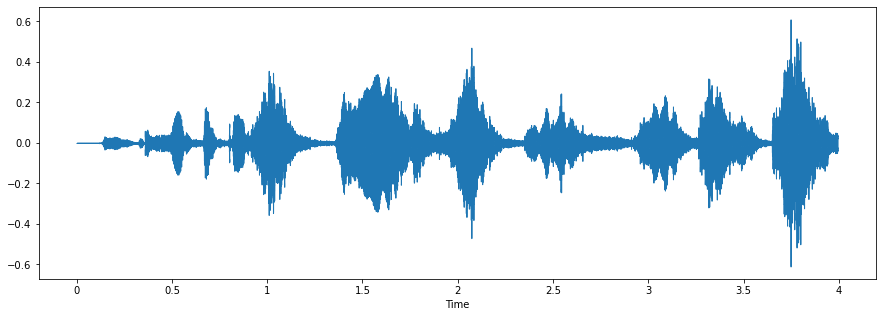

In [31]:
#The file 'output10.wav' in the next cell is the file that was recorded live using the code :
data, sampling_rate = librosa.load('output10.wav')
%matplotlib inline
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [33]:
## Appying extract_feature function on random file and then loading model to predict the result 
file = 'output10.wav'
data , sr = librosa.load(file)
data = np.array(data)
ans =[]
new_feature ,labels  = extract_feature(file, mfcc=True, chroma=True, mel=False)
ans.append(new_feature)
ans = np.array(ans)
#data.shape

Emotion_Voice_Detection_Model.predict(ans)

<ipython-input-12-27121aab337b>:8: UserWarning: n_fft=2048 is too small for input signal of length=2
  stft=np.abs(librosa.stft(X))


MemoryError: Unable to allocate 1.35 GiB for an array with shape (176128, 1025, 1) and data type complex64